In [15]:
def unpack_list(lst):
    """
    Unpacks a list of lists into a single list.

    Parameters:
    lst (list): The input list of lists.

    Returns:
    list: The unpacked list.
    """
    return [elem for sublist in lst for elem in sublist]

In [41]:
import numpy as np

def normalize_by_min(arr):
    arr = np.array(arr)  # convert list to numpy array
    if arr.ndim == 0:
        return arr  # return the input scalar
    elif arr.ndim == 1:
        return [x / np.nanmean(arr) for x in arr]  # normalize each element by the min value
    else:
        min_vals = np.apply_along_axis(np.nanmean, 1, arr)
        normalized_arr = arr / min_vals[:, np.newaxis]
        return normalized_arr.tolist()


In [88]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def plot_and_print_linreg(nested_x, nested_y, nested_labels, xlabel, ylabel, colors):
#     colors = ['red', 'green', 'blue', 'orange'] # Add more colors as needed
    for i in range(len(nested_x)):
        x = np.array(nested_x[i])
        y = np.array(nested_y[i])
        label = nested_labels[i]

        # Reshape the X array into a 2D array with one column
        x = x.reshape(-1, 1)

        # Fit a linear regression model
        model = LinearRegression()
        model.fit(x, y)

        # Print the slope (coefficient) of the linear regression
        slope = model.coef_[0]
        
        # Calculate correlation coefficient
        correlation_coefficient = np.corrcoef(x.flatten(), y.flatten())[0, 1]
        print(f"The coefficient (slope) of the linear regression for {label} is {correlation_coefficient}")

        # Print whether the correlation is significant
        p_val = get_p_val(x, y)
        if p_val < 0.05:
            print(f"The correlation between {xlabel} and {ylabel} for {label} is significant (p = {p_val})")
        else:
            print(f"The correlation between {xlabel} and {ylabel} for {label} is not significant (p = {p_val})")

        # Plot the scatterplot and linear regression line
        plt.scatter(x, y, color=colors[i], label=label)
        plt.plot(x, model.predict(x), color=colors[i])

    # Add labels to the plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title("Scatterplot with Linear Regression")
    plt.legend()
    plt.savefig('out.svg', format='svg', dpi=1200)
    # Show the plot
    plt.show()

def get_p_val(x, y):
    from scipy.stats import pearsonr
    corr, p_val = pearsonr(x.flatten(), y.flatten())
    return p_val


In [18]:
labels =['4', '5', '8', '10']

The coefficient (slope) of the linear regression for 4 is -0.04457395041609982
The correlation between COM_inside and speed for 4 is not significant (p = 0.87466607047348)
The coefficient (slope) of the linear regression for 5 is 0.46356132788543125
The correlation between COM_inside and speed for 5 is not significant (p = 0.08179004044821514)
The coefficient (slope) of the linear regression for 8 is -0.16361874922773978
The correlation between COM_inside and speed for 8 is not significant (p = 0.5601176361354872)
The coefficient (slope) of the linear regression for 10 is nan
The correlation between COM_inside and speed for 10 is not significant (p = nan)


C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


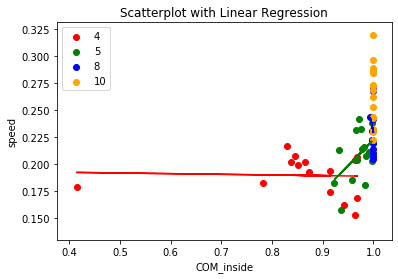

The coefficient (slope) of the linear regression for 4 is 0.015317476448508872
The correlation between COM_inside and speed for 4 is not significant (p = 0.9075261058948368)


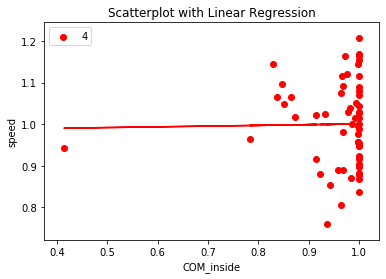

In [19]:
speed = [[0.204, 0.207, 0.153, 0.169, 0.162, 0.208, 0.202, 0.174, 0.183, 0.194, 0.179, 0.202, 0.193, 0.199, 0.217],
         [0.214, 0.233, 0.183, 0.185, 0.158, 0.211, 0.242, 0.203, 0.181, 0.208, 0.213, 0.238, 0.216, 0.204, 0.232],
         [0.220, 0.222, 0.210, 0.214, 0.205, 0.231, 0.271, 0.242, 0.270, 0.220, 0.208, 0.268, 0.244, 0.232, 0.222],
         [0.269, 0.272, 0.253, 0.273, 0.230, 0.289, 0.320, 0.243, 0.296, 0.244, 0.222, 0.284, 0.233, 0.262, 0.286]]
COM_inside = [[0.964, 0.968, 0.963, 0.968, 0.941, 0.846, 0.865, 0.915, 0.783, 0.915, 0.414, 0.837, 0.872, 0.851, 0.829],
              [0.977, 0.975, 0.923, 0.958, 0.936, 0.991, 0.971, 0.997, 0.984, 0.985, 0.933, 0.997, 0.981, 0.968, 0.966],
              [1, 0.997, 1, 1, 1, 0.998, 0.999, 1, 0.999, 0.999, 1, 1, 0.994, 1, 0.998],
              [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

plot_and_print_linreg(COM_inside, speed, labels, 'COM_inside', 'speed')
plot_and_print_linreg([unpack_list(COM_inside)], [unpack_list(normalize_by_min(speed))], labels, 'COM_inside', 'speed')

In [20]:
#### With M58
# speed = [[0.204, 0.207, 0.153, 0.169, 0.162, 0.208, 0.202, 0.174, 0.183, 0.194, 0.179, 0.202, 0.193, 0.199, 0.217],
#          [0.214, 0.233, 0.183, 0.185, 0.158, 0.211, 0.242, 0.203, 0.181, 0.208, 0.213, 0.238, 0.216, 0.204, 0.232],
#          [0.220, 0.222, 0.210, 0.214, 0.205, 0.231, 0.271, 0.242, 0.270, 0.220, 0.208, 0.268, 0.244, 0.232, 0.222],
#          [0.269, 0.272, 0.253, 0.273, 0.230, 0.289, 0.320, 0.243, 0.296, 0.244, 0.222, 0.284, 0.233, 0.262, 0.286]]
# COM_inside = [[0.964, 0.968, 0.963, 0.968, 0.941, 0.846, 0.865, 0.915, 0.783, 0.915, 0.414, 0.837, 0.872, 0.851, 0.829],
#               [0.977, 0.975, 0.923, 0.958, 0.936, 0.991, 0.971, 0.997, 0.984, 0.985, 0.933, 0.997, 0.981, 0.968, 0.966],
#               [1, 0.997, 1, 1, 1, 0.998, 0.999, 1, 0.999, 0.999, 1, 1, 0.994, 1, 0.998],
#               [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
# # COM_inside_with_outlier = [[97.4471,93.2667,93.9667,94.3077,96.9867,84.5778,86.2667,91.4609,78.287,91.4444,41.3579,83.6727,87.2118,85.07,82.9222],
# #               [97.6833, 97.4609, 92.2947, 95.7846, 95.4815, 99.0545, 97.5647, 99.6824, 98.45, 98.4833, 97.1368, 99.6667, 98.1241, 96.8, 96.563],
# #               [100, 100, 100, 100, 100, 99.7294, 100, 100, 99.9091, 99.9474, 100, 100, 99.35, 100, 99.8133],
# #               [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]]
# COM_dist_midline_rel = [[0.366, 0.406, 0.380, 0.372, 0.374, 0.637, 0.605, 0.497, 0.691, 0.524, 1.291, 0.598, 0.603, 0.586, 0.634],
#               [0.332, 0.307, 0.418, 0.363, 0.394, 0.350, 0.357, 0.329, 0.303, 0.338, 0.459, 0.274, 0.312, 0.333, 0.346],
#               [0.173, 0.180, 0.220, 0.150, 0.162, 0.268, 0.234, 0.194, 0.267, 0.262, 0.244, 0.286, 0.317, 0.305, 0.294],
#               [0.164, 0.197, 0.199, 0.168, 0.184, 0.182, 0.195, 0.225, 0.188, 0.254, 0.294, 0.349, 0.375, 0.270, 0.346]]
# COM_dist_midline_abs = [[0.732, 0.813, 0.761, 0.743, 0.748, 1.274, 1.209, 0.994, 1.383, 1.049, 2.582, 1.197, 1.206, 1.172, 1.268],
#               [0.830, 0.767, 1.046, 0.907, 0.986, 0.875, 0.893, 0.824, 0.757, 0.845, 1.149, 0.686, 0.781, 0.833, 0.865],
#               [0.693, 0.722, 0.879, 0.601, 0.647, 1.073, 0.936, 0.774, 1.069, 1.050, 0.978, 1.145, 1.267, 1.221, 1.175],
#               [0.819, 0.987, 0.996, 0.838, 0.919, 0.909, 0.975, 1.124, 0.941, 1.271, 1.472, 1.744, 1.873, 1.348, 1.730]]

# front_axis = [[4.640, 3.761, 3.649, 4.617, 4.071, 3.991, 4.957, 4.992, 4.102, 4.949, 7.225, 4.769, 4.072, 5.571, 3.799],
#               [4.222, 3.613, 3.843, 3.806, 4.356, 5.075, 4.074, 3.687, 3.554, 5.179, 4.493, 4.039, 4.047, 4.404, 3.762],
#               [4.315, 3.945, 3.421, 3.338, 3.085, 4.088, 4.831, 3.765, 3.936, 4.953, 3.942, 4.824, 3.400, 3.705, 3.920],
#               [3.765, 3.862, 3.911, 3.196, 3.389, 5.359, 5.252, 3.928, 3.946, 5.191, 5.003, 4.400, 3.935, 3.660, 4.268]]

# back_axis = [[12.488, 11.623, 11.454, 14.816, 11.377, 12.105, 11.564, 21.987, 13.632, 19.321, 19.536, 15.983, 18.821, 22.593, 11.972],
#               [11.303, 13.178, 13.068, 12.083, 12.038, 15.653, 12.873, 17.416, 16.575, 17.316, 15.182, 12.729, 18.105, 18.675, 11.067],
#               [9.839, 11.996, 12.136, 8.944, 7.134, 13.717, 14.885, 13.311, 15.720, 14.930, 14.865, 13.177, 16.053, 14.305, 13.566],
#               [9.000, 12.563, 12.898, 10.211, 7.610, 14.140, 13.372, 12.935, 14.029, 13.694, 11.329, 11.171, 12.510, 14.577, 15.907]]
# tail_axis = [[48.663, 41.022, 41.443, 47.564, 39.115, 40.314, 47.144, 46.073, 32.179, 48.371, 38.859, 54.129, 40.228, 45.842, 36.529],
#               [36.657, 39.128, 37.066, 40.392, 35.916, 44.491, 52.365, 43.858, 36.041, 41.412, 37.834, 49.921, 37.563, 47.359, 35.858],
#               [28.815, 33.851, 31.761, 30.882, 19.395, 36.848, 46.303, 32.228, 36.168, 40.880, 34.773, 46.592, 32.465, 41.106, 42.659],
#               [25.159, 34.089, 35.823, 29.246, 19.460, 36.800, 41.242, 26.816, 35.720, 31.993, 27.534, 35.226, 30.995, 39.364, 39.944]]
# tail_minus_back_axis = [[36.17467, 29.39939, 29.98945, 32.74785, 27.73787, 28.20922, 35.5801, 24.08578, 18.54727, 29.05027, 19.32333, 38.14581, 21.40765, 23.24907, 24.55768],
#               [25.35399, 25.9496, 23.99868, 28.30941, 23.87806, 28.83765, 39.49193, 26.44158, 19.4657, 24.09597, 22.65184, 37.1921, 19.45844, 28.68469, 24.79018],
#               [18.97614, 21.8546, 19.62442, 21.93788, 12.26187, 23.13082, 31.41771, 18.91703, 20.44843, 25.95064, 19.90753, 33.41479, 16.41235, 26.80135, 29.09329],
#               [16.15895, 21.52579, 22.92562, 19.03521, 11.85067, 22.66044, 27.87037, 13.88096, 21.69094, 18.29852, 16.20501, 24.05506, 18.48547, 24.78687, 24.03725]]

In [21]:
# tail_mean_side = [[123.5384, 129.2677, 106.2848, 110.6238, 128.6059, 89.31659, 152.2517, 76.90253, 76.78829, 89.51649, 36.54673, 111.6269, 88.96962, 64.98836, 103.5449],
#                [138.1095, 119.8027, 84.08635, 112.7595, 92.94477, 90.48943, 140.6579, 104.2819, 67.43388, 101.4972, 55.22297, 139.465, 92.42774, 97.6296, 105.997],
#                [156.5966, 125.6977, 107.2183, 157.7077, 130.1397, 103.0586, 129.5561, 106.5401, 124.4667, 115.2412, 67.80727, 136.1341, 128.6216, 134.7669, 107.4644],
#                [154.6732, 133.4284, 114.9997, 156.8066, 132.3407, 113.4382, 158.3977, 133.6406, 141.2596, 114.4987, 109.1348, 146.3128, 135.8779, 142.5022, 118.3888]]
# tail_disp_side = [[35.61257, 34.86959, 37.70405, 32.86737, 33.93442, 35.11956, 30.74609, 27.68918, 44.72402, 27.25057, 23.53389, 33.30458, 42.04616, 36.18129, 48.22614],
#                [31.8639, 34.65825, 36.77392, 30.24034, 34.55128, 34.68826, 36.15038, 25.51727, 39.0707, 29.03871, 25.25699, 32.48848, 41.30476, 46.44136, 32.03989],
#                [22.86067, 28.19643, 34.04745, 18.5096, 29.15532, 31.67978, 30.99305, 27.97879, 32.93253, 24.86568, 21.76554, 20.15272, 26.73749, 33.86175, 20.73929],
#                [21.07915, 26.64291, 33.92834, 20.01633, 24.13763, 22.24146, 25.08681, 21.78424, 26.84716, 18.92099, 28.47737, 20.42901, 25.58442, 30.69942, 19.14346]]


In [111]:
#### Without M58
slips = [[0.578947368,0.153846154,1,0.285714286,0.928571429,1.318181818,0.684210526,1.625,1.541666667,0.75,0.88,0.590909091,0.826086957,0.826086957],
         [0.578947368,0.076923077,1.45,0.703703704,0.827586207,0.4,0.090909091,0.277777778,0.75,0.12,0.290322581,0.258064516,0.571428571,0.275862069],
         [0,0,0.230769231,0.043478261,0.043478261,0.08,0.142857143,0.2,0.083333333,0,0,0,0.130434783,0.111111111],
         [0,0,0.22222222222222,0,0.041666666666667,0,0,0,0.074074074074074,0,0,0,0,0]]
speed = [[0.204, 0.207, 0.153, 0.169, 0.162, 0.208, 0.202, 0.174, 0.183, 0.194, 0.202, 0.193, 0.199, 0.217],
         [0.214, 0.233, 0.183, 0.185, 0.158, 0.211, 0.242, 0.203, 0.181, 0.208, 0.238, 0.216, 0.204, 0.232],
         [0.220, 0.222, 0.210, 0.214, 0.205, 0.231, 0.271, 0.242, 0.270, 0.220, 0.268, 0.244, 0.232, 0.222],
         [0.269, 0.272, 0.253, 0.273, 0.230, 0.289, 0.320, 0.243, 0.296, 0.244, 0.284, 0.233, 0.262, 0.286]]
COM_inside = [[0.964, 0.968, 0.963, 0.968, 0.941, 0.846, 0.865, 0.915, 0.783, 0.915, 0.837, 0.872, 0.851, 0.829],
              [0.977, 0.975, 0.923, 0.958, 0.936, 0.991, 0.971, 0.997, 0.984, 0.985, 0.997, 0.981, 0.968, 0.966],
              [1, 0.997, 1, 1, 1, 0.998, 0.999, 1, 0.999, 0.999, 1, 0.994, 1, 0.998],
              [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
# COM_inside_with_outlier = [[97.4471,93.2667,93.9667,94.3077,96.9867,84.5778,86.2667,91.4609,78.287,91.4444,41.3579,83.6727,87.2118,85.07,82.9222],
#               [97.6833, 97.4609, 92.2947, 95.7846, 95.4815, 99.0545, 97.5647, 99.6824, 98.45, 98.4833, 97.1368, 99.6667, 98.1241, 96.8, 96.563],
#               [100, 100, 100, 100, 100, 99.7294, 100, 100, 99.9091, 99.9474, 100, 100, 99.35, 100, 99.8133],
#               [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]]
COM_dist_midline_rel = [[0.366, 0.406, 0.380, 0.372, 0.374, 0.637, 0.605, 0.497, 0.691, 0.524, 0.598, 0.603, 0.586, 0.634],
              [0.332, 0.307, 0.418, 0.363, 0.394, 0.350, 0.357, 0.329, 0.303, 0.338, 0.274, 0.312, 0.333, 0.346],
              [0.173, 0.180, 0.220, 0.150, 0.162, 0.268, 0.234, 0.194, 0.267, 0.262, 0.286, 0.317, 0.305, 0.294],
              [0.164, 0.197, 0.199, 0.168, 0.184, 0.182, 0.195, 0.225, 0.188, 0.254, 0.349, 0.375, 0.270, 0.346]]
COM_dist_midline_abs = [[0.732, 0.813, 0.761, 0.743, 0.748, 1.274, 1.209, 0.994, 1.383, 1.049, 1.197, 1.206, 1.172, 1.268],
              [0.830, 0.767, 1.046, 0.907, 0.986, 0.875, 0.893, 0.824, 0.757, 0.845, 0.686, 0.781, 0.833, 0.865],
              [0.693, 0.722, 0.879, 0.601, 0.647, 1.073, 0.936, 0.774, 1.069, 1.050, 1.145, 1.267, 1.221, 1.175],
              [0.819, 0.987, 0.996, 0.838, 0.919, 0.909, 0.975, 1.124, 0.941, 1.271, 1.744, 1.873, 1.348, 1.730]]

front_axis = [[4.640, 3.761, 3.649, 4.617, 4.071, 3.991, 4.957, 4.992, 4.102, 4.949, 4.769, 4.072, 5.571, 3.799],
              [4.222, 3.613, 3.843, 3.806, 4.356, 5.075, 4.074, 3.687, 3.554, 5.179, 4.039, 4.047, 4.404, 3.762],
              [4.315, 3.945, 3.421, 3.338, 3.085, 4.088, 4.831, 3.765, 3.936, 4.953, 4.824, 3.400, 3.705, 3.920],
              [3.765, 3.862, 3.911, 3.196, 3.389, 5.359, 5.252, 3.928, 3.946, 5.191, 4.400, 3.935, 3.660, 4.268]]

back_axis = [[12.488, 11.623, 11.454, 14.816, 11.377, 12.105, 11.564, 21.987, 13.632, 19.321, 15.983, 18.821, 22.593, 11.972],
              [11.303, 13.178, 13.068, 12.083, 12.038, 15.653, 12.873, 17.416, 16.575, 17.316, 12.729, 18.105, 18.675, 11.067],
              [9.839, 11.996, 12.136, 8.944, 7.134, 13.717, 14.885, 13.311, 15.720, 14.930, 13.177, 16.053, 14.305, 13.566],
              [9.000, 12.563, 12.898, 10.211, 7.610, 14.140, 13.372, 12.935, 14.029, 13.694, 11.171, 12.510, 14.577, 15.907]]
tail_axis = [[48.663, 41.022, 41.443, 47.564, 39.115, 40.314, 47.144, 46.073, 32.179, 48.371, 54.129, 40.228, 45.842, 36.529],
              [36.657, 39.128, 37.066, 40.392, 35.916, 44.491, 52.365, 43.858, 36.041, 41.412, 49.921, 37.563, 47.359, 35.858],
              [28.815, 33.851, 31.761, 30.882, 19.395, 36.848, 46.303, 32.228, 36.168, 40.880, 46.592, 32.465, 41.106, 42.659],
              [25.159, 34.089, 35.823, 29.246, 19.460, 36.800, 41.242, 26.816, 35.720, 31.993, 35.226, 30.995, 39.364, 39.944]]
tail_minus_back_axis = [[36.17467, 29.39939, 29.98945, 32.74785, 27.73787, 28.20922, 35.5801, 24.08578, 18.54727, 29.05027, 38.14581, 21.40765, 22.81735, 24.55768],
              [25.35399, 25.9496, 23.99868, 28.30941, 23.15293, 27.99563, 39.49193, 26.44158, 19.4657, 24.09597, 37.1921, 19.03607, 28.68469, 24.79018],
              [18.97614, 21.8546, 19.62442, 21.93788, 12.26187, 23.13082, 31.41771, 18.91703, 20.44843, 25.95064, 33.41479, 16.41235, 26.26249, 29.09329],
              [16.15895, 21.17219, 22.92562, 19.03521, 10.82386, 22.66044, 27.87037, 13.88096, 21.69094, 18.04907, 24.05506, 18.48547, 24.78687, 24.03725]]

In [99]:
tail_mean_side = [[123.538435244063, 129.267685572014, 106.284847882527,110.623792930045, 128.605870000789, 89.3165949330826, 152.251741112535, 76.9025294567695, 76.7882913688043, 89.516492520638, 111.626856046091, 88.9696169211849, 64.9883576668046, 103.544881235178],
               [138.109504166027,119.80273391353,84.0863538385272,112.759483699913,92.944765895731,90.4894348999535,140.65785515702,104.281872954812,67.4338825713071,101.497165702946,139.465028554256,92.427737379995,97.6295976004472,105.997022157355],
               [156.596565507904,125.69766962155,107.218325835323,157.707740435108,130.139654475648,103.058642143788,129.556118616045,106.540069608952,124.466670379085,115.241206426989,136.134134992372,128.621552376729,134.766948545846,107.464371106661],
               [154.6732, 133.4284, 114.9997, 156.8066, 132.3407, 113.4382, 158.3977, 133.6406, 141.2596, 114.4987, 146.3128, 135.8779, 142.5022, 118.3888]]
tail_disp_side = [[35.61257, 34.86959, 37.70405, 32.86737, 33.93442, 35.11956, 30.74609, 27.68918, 44.72402, 27.25057, 33.30458, 42.04616, 36.18129, 48.22614],
               [31.8639, 34.65825, 36.77392, 30.24034, 34.55128, 34.68826, 36.15038, 25.51727, 39.0707, 29.03871, 32.48848, 41.30476, 46.44136, 32.03989],
               [22.86067, 28.19643, 34.04745, 18.5096, 29.15532, 31.67978, 30.99305, 27.97879, 32.93253, 24.86568, 20.15272, 26.73749, 33.86175, 20.73929],
               [21.07915, 26.64291, 33.92834, 20.01633, 24.13763, 22.24146, 25.08681, 21.78424, 26.84716, 18.92099, 20.42901, 25.58442, 30.69942, 19.14346]]


In [100]:
# #Extract all plots together for tail 
# plot_and_print_linreg([unpack_list(normalize_by_min(tail_disp_side))], [unpack_list((speed))], labels, 'tail_mean_side', 'speed')
# plot_and_print_linreg([unpack_list(normalize_by_min(tail_disp_side))], [unpack_list((speed))], labels, 'tail_mean_side', 'speed')

# plot_and_print_linreg([unpack_list(normalize_by_min(tail_disp_side))], [unpack_list((COM_dist_midline_rel))], labels, 'tail_mean_side', 'COM_dist_midline_rel')
# plot_and_print_linreg([unpack_list(normalize_by_min(tail_disp_side))], [unpack_list((COM_dist_midline_rel))], labels, 'tail_mean_side', 'COM_dist_midline_rel')


The coefficient (slope) of the linear regression for 4 is 0.3763456231518919
The correlation between front_axis and speed for 4 is significant (p = 0.04839376152279746)


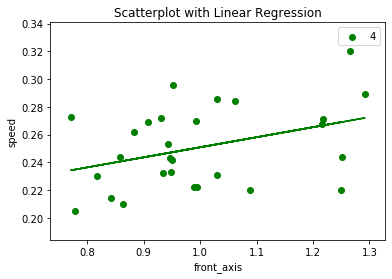

The coefficient (slope) of the linear regression for 4 is 0.40240424777856676
The correlation between back_axis and speed for 4 is significant (p = 0.03376021126440863)


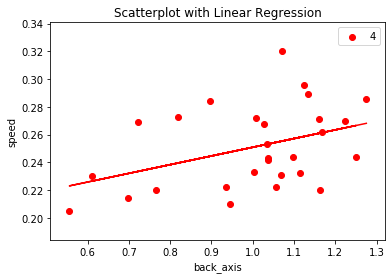

The coefficient (slope) of the linear regression for 4 is 0.4971162921144448
The correlation between tail_minus_back_axis and speed for 4 is significant (p = 0.007117568225081418)


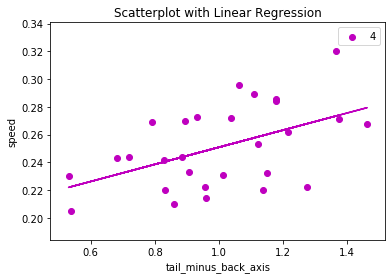

The coefficient (slope) of the linear regression for 4 is 0.17503987689285674
The correlation between front_axis and COM_dist_midline_rel for 4 is not significant (p = 0.37298203621277226)


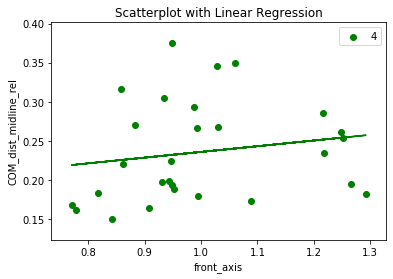

The coefficient (slope) of the linear regression for 4 is 0.5624826089037517
The correlation between back_axis and COM_dist_midline_rel for 4 is significant (p = 0.001835547193284975)


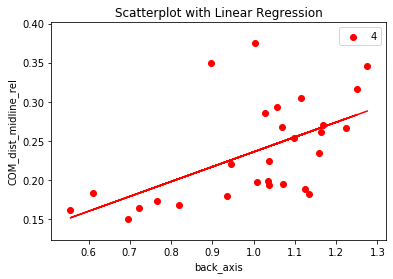

The coefficient (slope) of the linear regression for 4 is 0.33225848969662614
The correlation between tail_minus_back_axis and COM_dist_midline_rel for 4 is not significant (p = 0.08408628457881145)


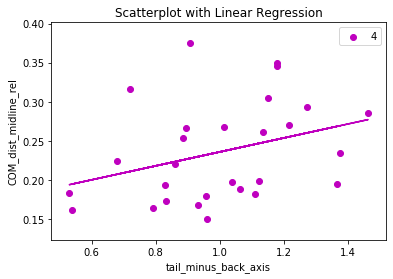

In [115]:
#Extract all plots together
widths_beg = 2
widths_end = 5
colors = ['green', 'red', 'magenta', 'gray'] # Add more colors as needed

plot_and_print_linreg([unpack_list(normalize_by_min(front_axis[widths_beg:widths_end]))], [unpack_list((speed[widths_beg:widths_end]))], labels, 'front_axis', 'speed', colors[0])
plot_and_print_linreg([unpack_list(normalize_by_min(back_axis[widths_beg:widths_end]))], [unpack_list((speed[widths_beg:widths_end]))], labels, 'back_axis', 'speed', colors[1])
plot_and_print_linreg([unpack_list(normalize_by_min(tail_minus_back_axis[widths_beg:widths_end]))], [unpack_list((speed[widths_beg:widths_end]))], labels, 'tail_minus_back_axis', 'speed', colors[2])

plot_and_print_linreg([unpack_list(normalize_by_min(front_axis[widths_beg:widths_end]))], [unpack_list((COM_dist_midline_rel[widths_beg:widths_end]))], labels, 'front_axis', 'COM_dist_midline_rel', colors[0])
plot_and_print_linreg([unpack_list(normalize_by_min(back_axis[widths_beg:widths_end]))], [unpack_list((COM_dist_midline_rel[widths_beg:widths_end]))], labels, 'back_axis', 'COM_dist_midline_rel', colors[1])
plot_and_print_linreg([unpack_list(normalize_by_min(tail_minus_back_axis[widths_beg:widths_end]))], [unpack_list((COM_dist_midline_rel[widths_beg:widths_end]))], labels, 'tail_minus_back_axis', 'COM_dist_midline_rel', colors[2])

The coefficient (slope) of the linear regression for 4 is 0.47025663413564084
The correlation between front_axis and speed for 4 is significant (p = 0.011561351226160897)


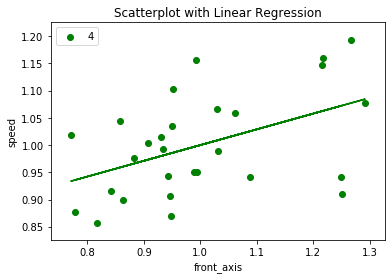

The coefficient (slope) of the linear regression for 4 is 0.5141025716490754
The correlation between back_axis and speed for 4 is significant (p = 0.005132193713859251)


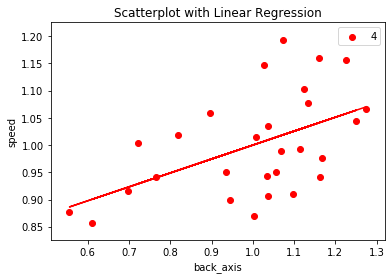

The coefficient (slope) of the linear regression for 4 is 0.6139258059322006
The correlation between tail_minus_back_axis and speed for 4 is significant (p = 0.0005111511241613082)


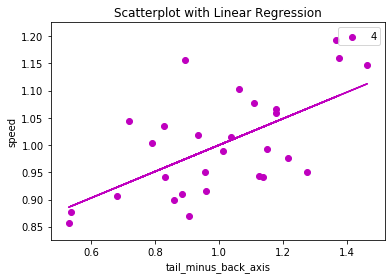

The coefficient (slope) of the linear regression for 4 is 0.17481988568782825
The correlation between front_axis and COM_dist_midline_rel for 4 is not significant (p = 0.37359254351136323)


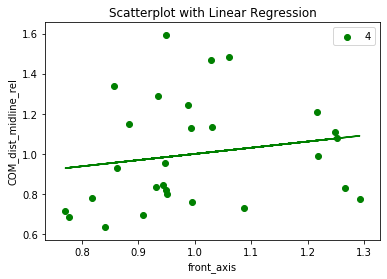

The coefficient (slope) of the linear regression for 4 is 0.5617224934857095
The correlation between back_axis and COM_dist_midline_rel for 4 is significant (p = 0.001867692549105221)


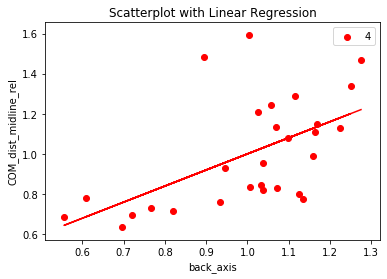

The coefficient (slope) of the linear regression for 4 is 0.3318588108989201
The correlation between tail_minus_back_axis and COM_dist_midline_rel for 4 is not significant (p = 0.08448265681180278)


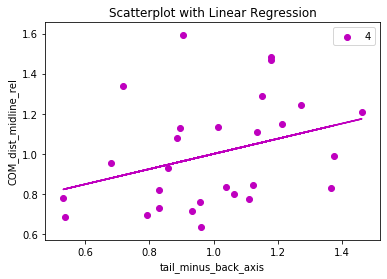

In [91]:
#Extract all plots together normalized on both axis
widths_beg = 2
widths_end = 5

plot_and_print_linreg([unpack_list(normalize_by_min(front_axis[widths_beg:widths_end]))], [unpack_list(normalize_by_min(speed[widths_beg:widths_end]))], labels, 'front_axis', 'speed', colors[0])
plot_and_print_linreg([unpack_list(normalize_by_min(back_axis[widths_beg:widths_end]))], [unpack_list(normalize_by_min(speed[widths_beg:widths_end]))], labels, 'back_axis', 'speed', colors[1])
plot_and_print_linreg([unpack_list(normalize_by_min(tail_minus_back_axis[widths_beg:widths_end]))], [unpack_list(normalize_by_min(speed[widths_beg:widths_end]))], labels, 'tail_minus_back_axis', 'speed', colors[2])

plot_and_print_linreg([unpack_list(normalize_by_min(front_axis[widths_beg:widths_end]))], [unpack_list(normalize_by_min(COM_dist_midline_rel[widths_beg:widths_end]))], labels, 'front_axis', 'COM_dist_midline_rel', colors[0])
plot_and_print_linreg([unpack_list(normalize_by_min(back_axis[widths_beg:widths_end]))], [unpack_list(normalize_by_min(COM_dist_midline_rel[widths_beg:widths_end]))], labels, 'back_axis', 'COM_dist_midline_rel', colors[1])
plot_and_print_linreg([unpack_list(normalize_by_min(tail_minus_back_axis[widths_beg:widths_end]))], [unpack_list(normalize_by_min(COM_dist_midline_rel[widths_beg:widths_end]))], labels, 'tail_minus_back_axis', 'COM_dist_midline_rel', colors[2])

The coefficient (slope) of the linear regression for 4 is 0.033681668845576884
The correlation between slips and speed for 4 is not significant (p = 0.9089948296535542)
The coefficient (slope) of the linear regression for 5 is -0.14095857145531143
The correlation between slips and speed for 5 is not significant (p = 0.6307598978528148)


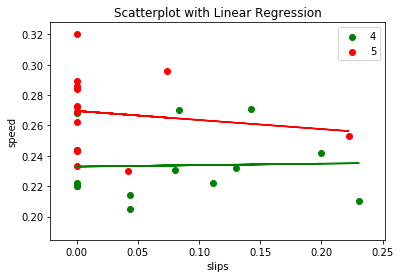

The coefficient (slope) of the linear regression for 4 is -0.08381246849326769
The correlation between slips and speed for 4 is not significant (p = 0.6715501574017837)


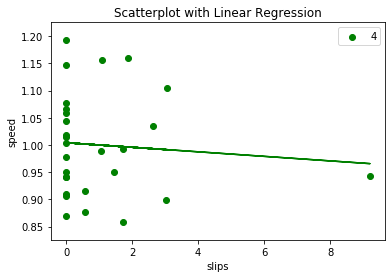

The coefficient (slope) of the linear regression for 4 is 0.011203707102782682
The correlation between slips and COM_dist_midline_rel for 4 is not significant (p = 0.9696775587374713)
The coefficient (slope) of the linear regression for 5 is -0.23942519487993208
The correlation between slips and COM_dist_midline_rel for 5 is not significant (p = 0.40970238257810365)


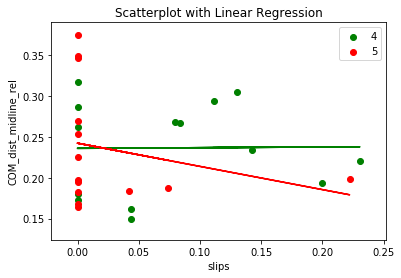

The coefficient (slope) of the linear regression for 4 is -0.17236916299325192
The correlation between slips and COM_dist_midline_rel for 4 is not significant (p = 0.380432924700219)


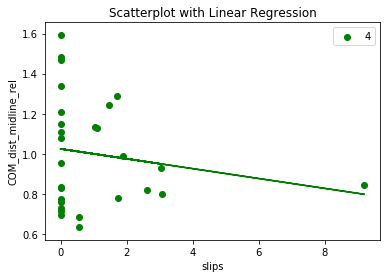

In [112]:
# slips = [[0.578947368,0.153846154,1,0.285714286,0.928571429,1.318181818,0.684210526,1.625,1.541666667,0.75,0.88,0.590909091,0.826086957,0.826086957],
#          [0.578947368,0.076923077,1.45,0.703703704,0.827586207,0.4,0.090909091,0.277777778,0.75,0.12,0.290322581,0.258064516,0.571428571,0.275862069]]
# speed = [[0.204, 0.207, 0.153, 0.169, 0.162, 0.208, 0.202, 0.174, 0.183, 0.194, 0.202, 0.193, 0.199, 0.217],
#          [0.214, 0.233, 0.183, 0.185, 0.158, 0.211, 0.242, 0.203, 0.181, 0.208, 0.238, 0.216, 0.204, 0.232]]
# COM_dist_midline_rel = [[0.366, 0.406, 0.380, 0.372, 0.374, 0.637, 0.605, 0.497, 0.691, 0.524, 0.598, 0.603, 0.586, 0.634],
#               [0.332, 0.307, 0.418, 0.363, 0.394, 0.350, 0.357, 0.329, 0.303, 0.338, 0.274, 0.312, 0.333, 0.346]]
widths_beg = 2
widths_end = 5
#Extract all plots slips VS performance
plot_and_print_linreg(slips[widths_beg:widths_end], speed[widths_beg:widths_end], labels, 'slips', 'speed', colors[3])
plot_and_print_linreg([unpack_list(normalize_by_min(slips[widths_beg:widths_end]))], [unpack_list(normalize_by_min(speed[widths_beg:widths_end]))], labels, 'slips', 'speed', colors[0])

plot_and_print_linreg(slips[widths_beg:widths_end], COM_dist_midline_rel[widths_beg:widths_end], labels, 'slips', 'COM_dist_midline_rel', colors[0])
plot_and_print_linreg([unpack_list(normalize_by_min(slips[widths_beg:widths_end]))], [unpack_list(normalize_by_min(COM_dist_midline_rel[widths_beg:widths_end]))], labels, 'slips', 'COM_dist_midline_rel', colors[0])


The coefficient (slope) of the linear regression for 4 is 0.11466379765255749
The correlation between front_axis and speed for 4 is not significant (p = 0.6962969605347994)
The coefficient (slope) of the linear regression for 5 is -0.023307111465364554
The correlation between front_axis and speed for 5 is not significant (p = 0.9369640062168886)
The coefficient (slope) of the linear regression for 8 is 0.5049887210014364
The correlation between front_axis and speed for 8 is not significant (p = 0.06550329833933198)
The coefficient (slope) of the linear regression for 10 is 0.43996325175105566
The correlation between front_axis and speed for 10 is not significant (p = 0.11542667497442478)


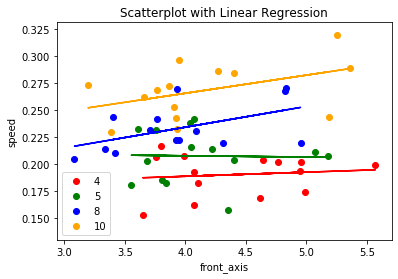

The coefficient (slope) of the linear regression for 4 is 0.17309897619854345
The correlation between front_axis and speed for 4 is not significant (p = 0.2020283076444208)


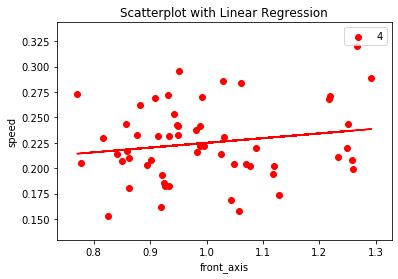

In [25]:
plot_and_print_linreg(front_axis, speed, labels, 'front_axis', 'speed')
plot_and_print_linreg([unpack_list(normalize_by_min(front_axis))], [unpack_list(speed)], labels, 'front_axis', 'speed')


The coefficient (slope) of the linear regression for 4 is 0.11769147033176225
The correlation between back_axis and speed for 4 is not significant (p = 0.6886393687470023)
The coefficient (slope) of the linear regression for 5 is 0.1470854002515709
The correlation between back_axis and speed for 5 is not significant (p = 0.615824797096221)
The coefficient (slope) of the linear regression for 8 is 0.27400483943899095
The correlation between back_axis and speed for 8 is not significant (p = 0.3431484510583809)
The coefficient (slope) of the linear regression for 10 is 0.10553991332118581
The correlation between back_axis and speed for 10 is not significant (p = 0.7195336865704424)


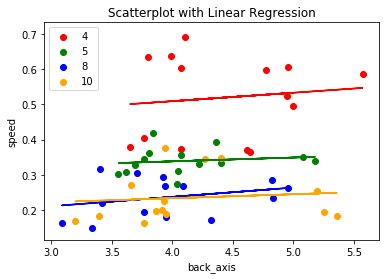

The coefficient (slope) of the linear regression for 4 is 0.14753810275329093
The correlation between back_axis and speed for 4 is not significant (p = 0.2778667238803814)


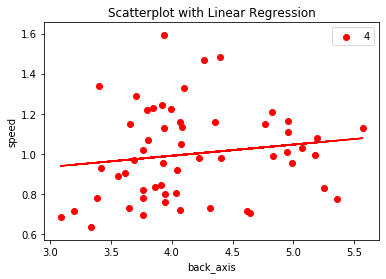

In [26]:
plot_and_print_linreg(front_axis, COM_dist_midline_rel, labels, 'back_axis', 'speed')
plot_and_print_linreg([unpack_list(front_axis)], [unpack_list(normalize_by_min(COM_dist_midline_rel))], labels, 'back_axis', 'speed')

The coefficient (slope) of the linear regression for 4 is 0.11769147033176225
The correlation between tail_axis and speed for 4 is not significant (p = 0.6886393687470023)
The coefficient (slope) of the linear regression for 5 is 0.1470854002515709
The correlation between tail_axis and speed for 5 is not significant (p = 0.615824797096221)
The coefficient (slope) of the linear regression for 8 is 0.2740048394389909
The correlation between tail_axis and speed for 8 is not significant (p = 0.3431484510583809)
The coefficient (slope) of the linear regression for 10 is 0.10553991332118581
The correlation between tail_axis and speed for 10 is not significant (p = 0.7195336865704424)


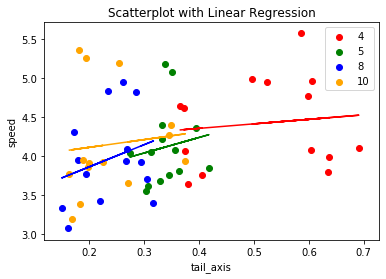

The coefficient (slope) of the linear regression for 4 is 0.11769147033176212
The correlation between tail_axis and speed for 4 is not significant (p = 0.6886393687470028)
The coefficient (slope) of the linear regression for 5 is 0.14708540025157085
The correlation between tail_axis and speed for 5 is not significant (p = 0.6158247970962205)
The coefficient (slope) of the linear regression for 8 is 0.27400483943899084
The correlation between tail_axis and speed for 8 is not significant (p = 0.3431484510583812)
The coefficient (slope) of the linear regression for 10 is 0.10553991332118569
The correlation between tail_axis and speed for 10 is not significant (p = 0.7195336865704419)


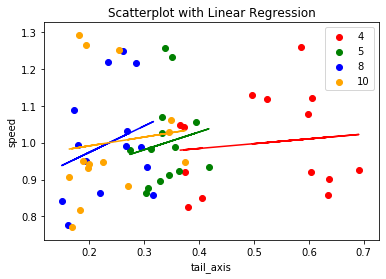

The coefficient (slope) of the linear regression for 4 is 0.07439623537064881
The correlation between tail_axis and speed for 4 is not significant (p = 0.5858017689924009)


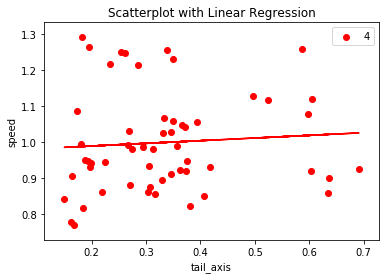

In [27]:
plot_and_print_linreg(COM_dist_midline_rel, front_axis, labels, 'tail_axis', 'speed')
plot_and_print_linreg(COM_dist_midline_rel, normalize_by_min(front_axis), labels, 'tail_axis', 'speed')
plot_and_print_linreg([unpack_list(COM_dist_midline_rel)], [unpack_list(normalize_by_min(front_axis))], labels, 'tail_axis', 'speed')

In [28]:
plot_and_print_linreg(tail_mean_side, speed, labels, 'tail_axis', 'speed')
plot_and_print_linreg(tail_mean_side, normalize_by_min(speed), labels, 'tail_axis', 'speed')
plot_and_print_linreg([unpack_list(tail_mean_side)], [unpack_list(normalize_by_min(speed))], labels, 'tail_axis', 'speed')

NameError: name 'tail_mean_side' is not defined

In [ ]:
plot_and_print_linreg(tail_disp_side, speed, labels, 'tail_axis', 'speed')
plot_and_print_linreg(tail_disp_side, normalize_by_min(speed), labels, 'tail_axis', 'speed')
plot_and_print_linreg([unpack_list(tail_mean_side)], [unpack_list(normalize_by_min(speed))], labels, 'tail_axis', 'speed')

In [ ]:
plot_and_print_linreg(tail_mean_side, back_axis, labels, 'tail_mean_side', 'back_axis')
plot_and_print_linreg(tail_mean_side, normalize_by_min(back_axis), labels, 'tail_mean_side', 'back_axis')
plot_and_print_linreg([unpack_list(tail_mean_side)], [unpack_list(normalize_by_min(back_axis))], labels, 'tail_mean_side', 'back_axis')

In [ ]:
plot_and_print_linreg(speed, tail_mean_side, labels, 'speed', 'tail_mean_side')
plot_and_print_linreg(speed, normalize_by_min(tail_mean_side), labels, 'speed', 'tail_mean_side')
plot_and_print_linreg([unpack_list(speed)], [unpack_list((tail_mean_side))], labels, 'speed', 'tail_mean_side')

In [ ]:
labels